<a href="https://colab.research.google.com/github/OlegKuzmin1968/Oleg_Kuzmin/blob/main/Stag_%D0%A7%D1%82%D0%B5%D0%BD%D0%B8%D0%B5_NIfTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стажировка

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *Обработка Python. NII-файла (nifti) и DICOM-файла*

# Загрузка

In [ ]:
from nibabel.viewers import OrthoSlicer3D
from nibabel import nifti1
import nibabel as nib
from matplotlib import pylab as plt
import matplotlib
import numpy as np
from matplotlib import pyplot, cm
import os

In [ ]:
from PIL import Image # Синтаксис и описание функции Image.open():

In [ ]:
img.dataobj?

# Сегментация плеврального выпота (NIfTI)

Файл из предоставленного заказчиком Data Seta

**Pleural Effusion Segmentations (NIfTI, 1.7 MB zip)**

     - PleThora Effusions June 2020

        - Effusions

           - LUNG1-420

             - LUNG1-420_effusion_third_reviewer.nii.gz   # Загружаем этот файл

                    - LUNG1-420_effusion_third_reviewer.nii

## Читаем информацию и выводим несколько изображений из файла ххх/nii.gz

что это?  <class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 134)
affine: 
[[  -0.9765625    -0.            0.          249.51171875]
 [  -0.            0.9765625    -0.          -51.51171875]
 [   0.            0.            3.         -709.        ]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 134   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9765625  0.9765625  3.         0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
c

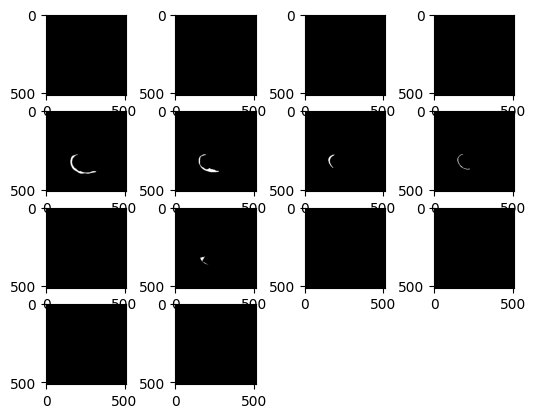

In [ ]:
# Разместил файл у себя на Google диске
# Укажим путь и имя файла nii.gz, который хотим посмотреть
example_filename = '/content/drive/MyDrive/Stag/LUNG1-420_effusion_third_reviewer.nii.gz'
img = nib.load(example_filename)     # Загружаем файл в переменную


 # Смотрим что загрузили
print('что это? ', img, '\n' )            # выдаем много информации
print('смотрим размерность ', img.shape)  # смотрим размерность
print('это:  ', img.dataobj.shape)        # смотрим размерность

 # Печатаем только три параметра размерности
width, height, queue = img.dataobj.shape
print('width', width)
print('height', height)
print('queue', queue)

 # Показать 3D -изображение
# OrthoSlicer3D(img.dataobj).show()  # выводит пустое окно ???


 # Рассчет, количества окон на экране для размещения всех срезов
x = int((queue/10) ** 0.5) + 1   # выводим каждый 10-й слайс
num = 1                          # порядковый номер картинки

 # Выводим в цикле каждый 10-й слайс, из всех имеющихся queue. Отображаем 2D -изображение.
for i in range(0, queue, 10):
  img_arr = img.dataobj[:, :, i]
  plt.subplot(x, x, num)
  plt.imshow(img_arr, cmap='gray')
  num += 1


plt.show()

## Выводим один из слайсов файла ххх/nii.gz

In [ ]:
type (img)

nibabel.nifti1.Nifti1Image

In [ ]:
w = img[:,:,45]  # Невозможно нарезать объекты изображений;
# рассмотрите возможность использования `img.slicer[slice]`
# для создания нарезанного изображения (смотрите документацию для предостережений)
# или нарезки данных массива изображений с помощью `img.dataobj[slice]`
# или `img.get_fdata()[slice]`

Размер переменной w.shape (512, 512)


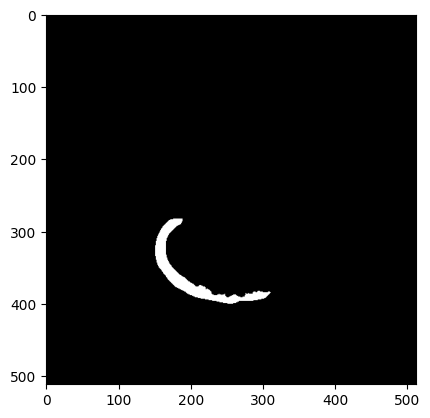

In [ ]:
w = img.dataobj[:,:,44]                         # вытаскиваем из img - переменной, которая содержит 134 слайса, один 44
print('Размер переменной w.shape', w.shape)

plt.imshow (w, cmap='gray')
plt.show()

## Преобразуем  **class 'nibabel.nifti1.Nifti1Image'** в np-массив

In [ ]:
print('Тип переменной одного слайса -',type (img))
print('Переводим его в np-массив')
w_np = np.array (w)
print('Новый тип переменной', type(w_np), 'Размерность', w_np.shape)

Тип переменной одного слайса - <class 'nibabel.nifti1.Nifti1Image'>
Переводим его в np-массив
Новый тип переменной <class 'numpy.ndarray'> Размерность (512, 512)


In [ ]:
# Добавим размерность для подачи в НС
w_np3 = np.reshape (w_np,[512,512,1])
print('Тип переменной-',type(w_np3), 'Размер-', w_np3.shape)

Тип переменной- <class 'numpy.ndarray'> Размер- (512, 512, 1)


### Запись и чтение массива на GooglDick


In [ ]:
a = np.array([1, 2, 3, 4, 5,6]) # создаем массив

with open('/content/drive/MyDrive/Baza/Stag_1/np/array.txt', 'w') as f: # Оператор with создает диспетчер контекста в Пайтоне,
                                                                        # который автоматически закрывает файл для вас, по окончанию работы в нем.
  np.savetxt(f, a)


In [ ]:
# Чтения массива в NB colab d gthtvtyye. np_array:

with open('/content/drive/MyDrive/Baza/Stag_1/np/array.txt', 'r') as f:
  a = np.loadtxt(f)
  print('a', a, type(a), a.shape)

a [1. 2. 3. 4. 5. 6.] <class 'numpy.ndarray'> (6,)


### Технология сборки слайсов в один 3D np-массив

In [ ]:
mas1 = np.random.randint(1,5, (1,2,2))
print (mas1, mas1.shape)

[[[2 1]
  [2 4]]] (1, 2, 2)


In [ ]:
mas2 = np.random.randint(5,10, (1,2,2))
print (mas2, mas2.shape)

[[[8 8]
  [5 5]]] (1, 2, 2)


In [ ]:
mas3 = np.random.randint(10,15, (1,2,2))
print (mas3, mas3.shape)

[[[10 13]
  [14 14]]] (1, 2, 2)


In [ ]:
a = np.append (mas1, mas2, axis=0)
print(a.shape)
a

(2, 2, 2)


array([[[2, 1],
        [2, 4]],

       [[8, 8],
        [5, 5]]])

In [ ]:
a = np.append (a, mas3, axis=0)
print(a.shape)
a

(3, 2, 2)


array([[[ 2,  1],
        [ 2,  4]],

       [[ 8,  8],
        [ 5,  5]],

       [[10, 13],
        [14, 14]]])

In [ ]:
a[0]

array([[2, 1],
       [2, 4]])

In [ ]:
a[1]

array([[8, 8],
       [5, 5]])

In [ ]:
a[2]

array([[10, 13],
       [14, 14]])

In [ ]:
a[0,:1]

array([[2, 1]])

In [ ]:
a[0,0,1]

1

In [ ]:
a[:,0,0]

array([ 2,  8, 10])

### Сделаем три среза данных
из разных областей картинки, примерно оценив их координаты. Цель - посмотреть значения пикселя.

In [ ]:
# Координаты правого легкого - "белого" участка картинки
print(w_np3[300,100:200,0])
print('Значение 1 соответствует белому цвету на картинке')
print('Черный фон имеет значение пикселя 0')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Значение 1 соответствует белому цвету на картинке
Черный фон имеет значение пикселя 0


# Сегментация грудной клетки (NIfTI)

## Читаем информацию и выводим несколько изображений из файла ххх/nii

что это?  <class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 116)
affine: 
[[  -0.9765625     0.            0.          249.51171875]
 [   0.            0.9765625     0.          -59.51171875]
 [   0.            0.            3.         -619.        ]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 116   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9765625  0.9765625  3.         0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
c

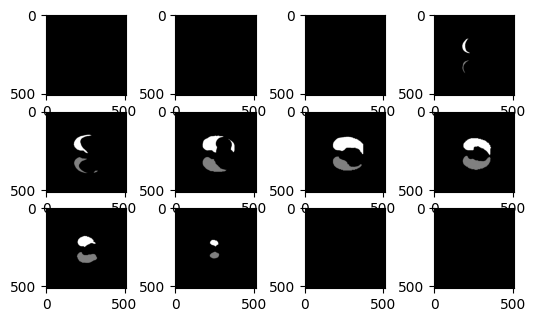

In [ ]:
# Разместил файл у себя на Google диске
# Укажим путь и имя файла nii, который хотим посмотреть
example_filename = '/content/drive/MyDrive/Stag/LUNG1-422_thor_cav_primary_reviewer.nii'
img = nib.load(example_filename)


 # Смотрим что загрузили
print('что это? ', img, '\n')            # выдаем много информации
print('смотрим размерность ', img.shape)  # смотрим размерность
print('это:  ', img.dataobj.shape)        # смотрим размерность

 # Печатаем только три параметра размерности
width, height, queue = img.dataobj.shape
print('width', width)
print('height', height)
print('queue', queue)

 # Показать 3D -изображение
# OrthoSlicer3D(img.dataobj).show()  # выводит пустое окно ???


 # Рассчет, количества окон на экране для размещения всех срезов
x = int((queue/10) ** 0.5) + 1   # выводим каждый 10-й слайс
num = 1                          # порядковый номер картинки

 # Выводим в цикле каждый 10-й слайс, из всех имеющихся queue. Отображаем 2D -изображение.
for i in range(0, queue, 10):
  img_arr = img.dataobj[:, :, i]
  plt.subplot(x, x, num)
  plt.imshow(img_arr, cmap='gray')
  num += 1

plt.show()

## Выводим один из слайсов файла ххх/nii

In [ ]:
type (img)

nibabel.nifti1.Nifti1Image

Размер переменной w.shape (512, 512)


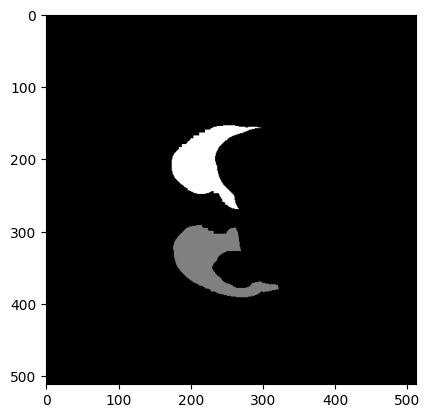

In [ ]:
w = img.dataobj[:,:,44]                         # вытаскиваем из img - переменной, которая содержит 134 слайса, один 44
print('Размер переменной w.shape', w.shape)

plt.imshow (w, cmap='gray')
plt.show()

## Преобразуем  **class 'nibabel.nifti1.Nifti1Image'** в np-массив

In [ ]:
print('Тип переменной одного слайса -',type (img))
print('Переводим его в np-массив')
w_np = np.array (w)
print('Новый тип переменной', type(w_np), 'Размерность', w_np.shape)

Тип переменной одного слайса - <class 'nibabel.nifti1.Nifti1Image'>
Переводим его в np-массив
Новый тип переменной <class 'numpy.ndarray'> Размерность (512, 512)


In [ ]:
# Добавим размерность для подачи в НС
w_np3 = np.reshape (w_np,[512,512,1])
print('Тип переменной-',type(w_np3), 'Размер-', w_np3.shape)

Тип переменной- <class 'numpy.ndarray'> Размер- (512, 512, 1)


## Сделаем три среза данных
из разных областей картинки, примерно оценив их координаты. Цель - посмотреть значения пикселя.

In [ ]:
# Координаты правого легкого - "белого" участка картинки
print(w_np3[200:210,200:210,0])
print('Значение 2 соответствует белому цвету на картинке')

[[2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]]
Значение 2 соответствует белому цвету на картинке


In [ ]:
# Координаты первого "фона" на картинке
print (w_np3[0:10,0:10,0])
print('Значение 0 соответствует церному цвету на картинке')

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Значение 0 соответствует церному цвету на картинке


In [ ]:
# Координаты левого легкого - "серого" участка картинки
print (w_np3[300:310,200:210,0])
print('Значение 1 соответствует "серому" цвету на картинке - левое легкое')

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
Значение 1 соответствует "серому" цвету на картинке - левое легкое


# Просмотр изображений DICOM с помощью pydicom и matplotlib

## Загрузки библиотек для работы с DICOM

In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.4 MB/s eta 0:00:00


In [ ]:
# Единственный интересный момент здесь заключается в том, как я упоминал в разделе "Пакет pydicom",
# что пакет pydicom импортируется как dicom, поэтому будьте осторожны с этим.

import pydicom           # запустился так
import pydicom.data      # + metod

## Путь к каталогу с файлами DICOM

**базовая версия кода**

In [ ]:
# Вызов локального файла dicom
folder_path = r"D:\Files\Data\Materials"
file_name = "PA1_0001.dcm"
file_path = os.path.join(folder_path,file_name)
ds = pydicom.dcmread(file_path)

**локальная (в моем NB) версия кода**

In [ ]:
base = "/content/drive/MyDrive/Baza/Stag_1/Original_Directory/NSCLC-Radiomics/LUNG1-090/02-01-2006-StudyID-NA-26480/0.000000-NA-04535/" #/content/drive/MyDrive/Stag"
pass_dicom = "1-001.dcm"    # file name is 1-12.dcm
print(pass_dicom)
print(base)

1-001.dcm
/content/drive/MyDrive/Baza/Stag_1/Original_Directory/NSCLC-Radiomics/LUNG1-090/02-01-2006-StudyID-NA-26480/0.000000-NA-04535/


In [ ]:
# filename = pydicom.data.data_manager.get_files(base, pass_dicom)[0]
q = pydicom.data.data_manager.get_files (base, pass_dicom)[0]               # разобраться с [0]

In [ ]:
print (type (q))
print ('Путь',q)

<class 'str'>
Путь /content/drive/MyDrive/Baza/Stag_1/Original_Directory/NSCLC-Radiomics/LUNG1-090/02-01-2006-StudyID-NA-26480/0.000000-NA-04535/1-001.dcm


## Чтение и отрисовка файла DICOM

Тип переменной ds (type) -  <class 'pydicom.dataset.FileDataset'>


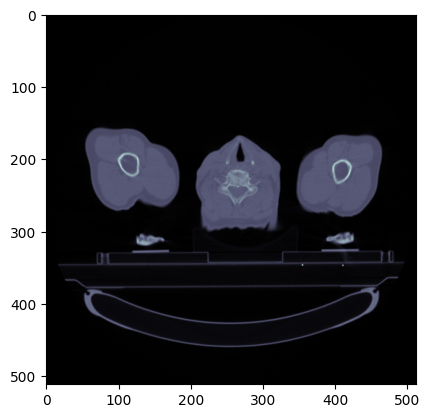

In [ ]:
ds = pydicom.dcmread(q)                            # Функция считывает одно изображение и возвращает объект pydicom.dataset.FileDataset
print('Тип переменной ds (type) - ', type (ds))
# enter DICOM image name for pattern
# введите название изображения DICOM для шаблона
# result is a list of 1 element
# результатом является список из 1 элемента

plt.imshow(ds.pixel_array, cmap=plt.cm.bone)       # set the color map to bone
plt.show()

In [ ]:
print(ds.PatientID,ds.StudyDate,ds.Modality) # прочитаем значения тегов

LUNG1-090 20060201 CT


In [ ]:
ds  # Вопрос 1: как и в какой формат все, что видим ниже вытащить?.  Вопрос 2: что вытаскивать?

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.99.99.21505511164117388327404222995484010563
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.32722.99.99.21

## Перевод в np-массив файл DICOM

Используйте Python для чтения и записи файлов Dicom
https://russianblogs.com/article/84851535474/

После чтения файла Dicom вы можете использовать Numpy (data = np.array(ds.pixel_array)

In [ ]:
print('Тип переменной исходного слайса -',type (ds))
print('Переводим его в np-массив')

q_np = np.array(ds.pixel_array, dtype = np.int32) # можно изменить размер переменной

print('\n','Новый тип переменной', type(q_np))
print(' Размерность полученного массива', q_np.shape)
print(' Размерность переменной', q_np.dtype )

Тип переменной исходного слайса - <class 'pydicom.dataset.FileDataset'>
Переводим его в np-массив

 Новый тип переменной <class 'numpy.ndarray'>
 Размерность полученного массива (512, 512)
 Размерность переменной int32


In [ ]:
# Сделаем срез данных из середины массива 100х100
q_np [250:350,250:350]

array([[1321, 1357, 1396, ...,  496,  770,  905],
       [1154, 1212, 1290, ...,  458,  745,  909],
       [1060, 1073, 1142, ...,  347,  687,  889],
       ...,
       [ 249,  253,  253, ...,  169,  165,  169],
       [ 174,  177,  166, ...,  138,  128,  144],
       [ 135,  130,  125, ...,  113,  124,  120]], dtype=int32)

In [ ]:
# Посмотрим диапазон значений пикселей в массиве

print ('Max значение пикселя', np.max(q_np))
print ('Min значение пикселя', np.min(q_np))

Max значение пикселя 2731
Min значение пикселя 0


**Чтобы собрать 3D массив из отдельных слайсов необходимо добавить одну размерность, по которой мы будем собирать 3Dмассив.**

In [ ]:
# Создадим пустой 3D массив. Названию массива присвоим инентификатор пациента из первого слейса
name = ds.PatientID
name


'LUNG1-090'

In [ ]:
name = np.array ([])

In [ ]:
name

array([], dtype=float64)

In [ ]:
LUNG1-090 = np.array ([])

SyntaxError: ignored

In [ ]:
LUNG1_090 = np.zeros ((1,512,512),dtype='int')  # необходимо заменить с ID пациента '-' на '_'
print(LUNG1_090.shape, LUNG1_090.dtype)

(1, 512, 512) int64


In [ ]:
print('LUNG1_090 - zeros',  LUNG1_090 [0,246:256,246:256])

LUNG1_090 - zeros [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Добавим размерность для подачи в 3D массив
q_np = np.reshape (q_np,[1,512,512])
print('Тип переменной-',type(q_np), 'Размер-', q_np.shape)

Тип переменной- <class 'numpy.ndarray'> Размер- (1, 512, 512)


In [ ]:
LUNG1_090 = LUNG1_090 + q_np  # первый шаг - исходный '0'-ой массив складываем с первым слайсом (чтобы его исключить из DS)
print(LUNG1_090.shape)

(1, 512, 512)


In [ ]:
print('Первый слайс пациента ','\n','\n',q_np [0,246:256,246:256])

Первый слайс пациента  
 
 [[1300 1245 1244 1248 1242 1261 1357 1371 1164 1067]
 [1313 1329 1293 1256 1248 1261 1319 1395 1257 1165]
 [1322 1338 1362 1408 1348 1283 1256 1342 1372 1259]
 [1185 1248 1336 1408 1413 1435 1398 1307 1383 1348]
 [1129 1143 1212 1276 1321 1357 1396 1397 1368 1385]
 [1093 1085 1081 1107 1154 1212 1290 1422 1458 1384]
 [1064 1074 1073 1092 1060 1073 1142 1262 1446 1466]
 [1083 1072 1062 1067 1087 1092 1074 1076 1240 1462]
 [1072 1074 1070 1067 1062 1060 1074 1075 1127 1266]
 [1084 1080 1072 1071 1076 1079 1049 1005 1052 1125]]


In [ ]:
print('LUNG1_090 - zeros + Первый слайс пациента','\n','\n',LUNG1_090 [0,246:256,246:256])

LUNG1_090 - zeros + Первый слайс пациента 
 
 [[1300 1245 1244 1248 1242 1261 1357 1371 1164 1067]
 [1313 1329 1293 1256 1248 1261 1319 1395 1257 1165]
 [1322 1338 1362 1408 1348 1283 1256 1342 1372 1259]
 [1185 1248 1336 1408 1413 1435 1398 1307 1383 1348]
 [1129 1143 1212 1276 1321 1357 1396 1397 1368 1385]
 [1093 1085 1081 1107 1154 1212 1290 1422 1458 1384]
 [1064 1074 1073 1092 1060 1073 1142 1262 1446 1466]
 [1083 1072 1062 1067 1087 1092 1074 1076 1240 1462]
 [1072 1074 1070 1067 1062 1060 1074 1075 1127 1266]
 [1084 1080 1072 1071 1076 1079 1049 1005 1052 1125]]


**Поставив эту команду в цикл по слайсам пациента можно собрать 3D np-массив из первичного снимка в диапазоне пикселей 0-~4000**

In [ ]:
LUNG1_090 = np.append (LUNG1_090, q_np, axis=0) # так сформирован 3D массив для пациента LUNG1_090
print(LUNG1_090.shape)

(2, 512, 512)


## Как собрать все файлы .dcm в список с именем list

In [ ]:
PathDicom = "./MyHead/"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

Единственный интересный момент здесь заключается в том, как я упоминал в разделе "Пакет pydicom", что пакет pydicom импортируется как dicom, поэтому будьте осторожны с этим. Далее мы используем os.path.пройдитесь по каталогу Myheart и соберите все файлы .dcm в список с именем lstFilesDCM: